# Estimating Car Prices

### Problem Statement

Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Car dataset

In [796]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [797]:
import numpy as np
import pandas as pd

In [798]:
car = pd.read_csv("CarPrice_Assignment.csv")

In [799]:
# Check the head of the dataset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the car dataframe

In [800]:
car.shape

(205, 26)

In [801]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

There are no NULL values in the dataframe.

In [802]:
car.duplicated().value_counts()

False    205
dtype: int64

There are no duplicate rows to be taken care of.

In [803]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [804]:
car['CarName'].nunique()

147

Extract the Company name from the CarName

In [805]:
carname=car['CarName'].apply(lambda x:x.split())
car['Company']=carname.apply(lambda x: x[0])

In [806]:
car['car_ID'].nunique()

205

We can drop the CarName and car_ID columns as car_ID has all unique values which are of no importance for the analysis

In [807]:
car=car.drop(['CarName','car_ID'],axis=1)

In [808]:
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [809]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 2880x2160 with 0 Axes>

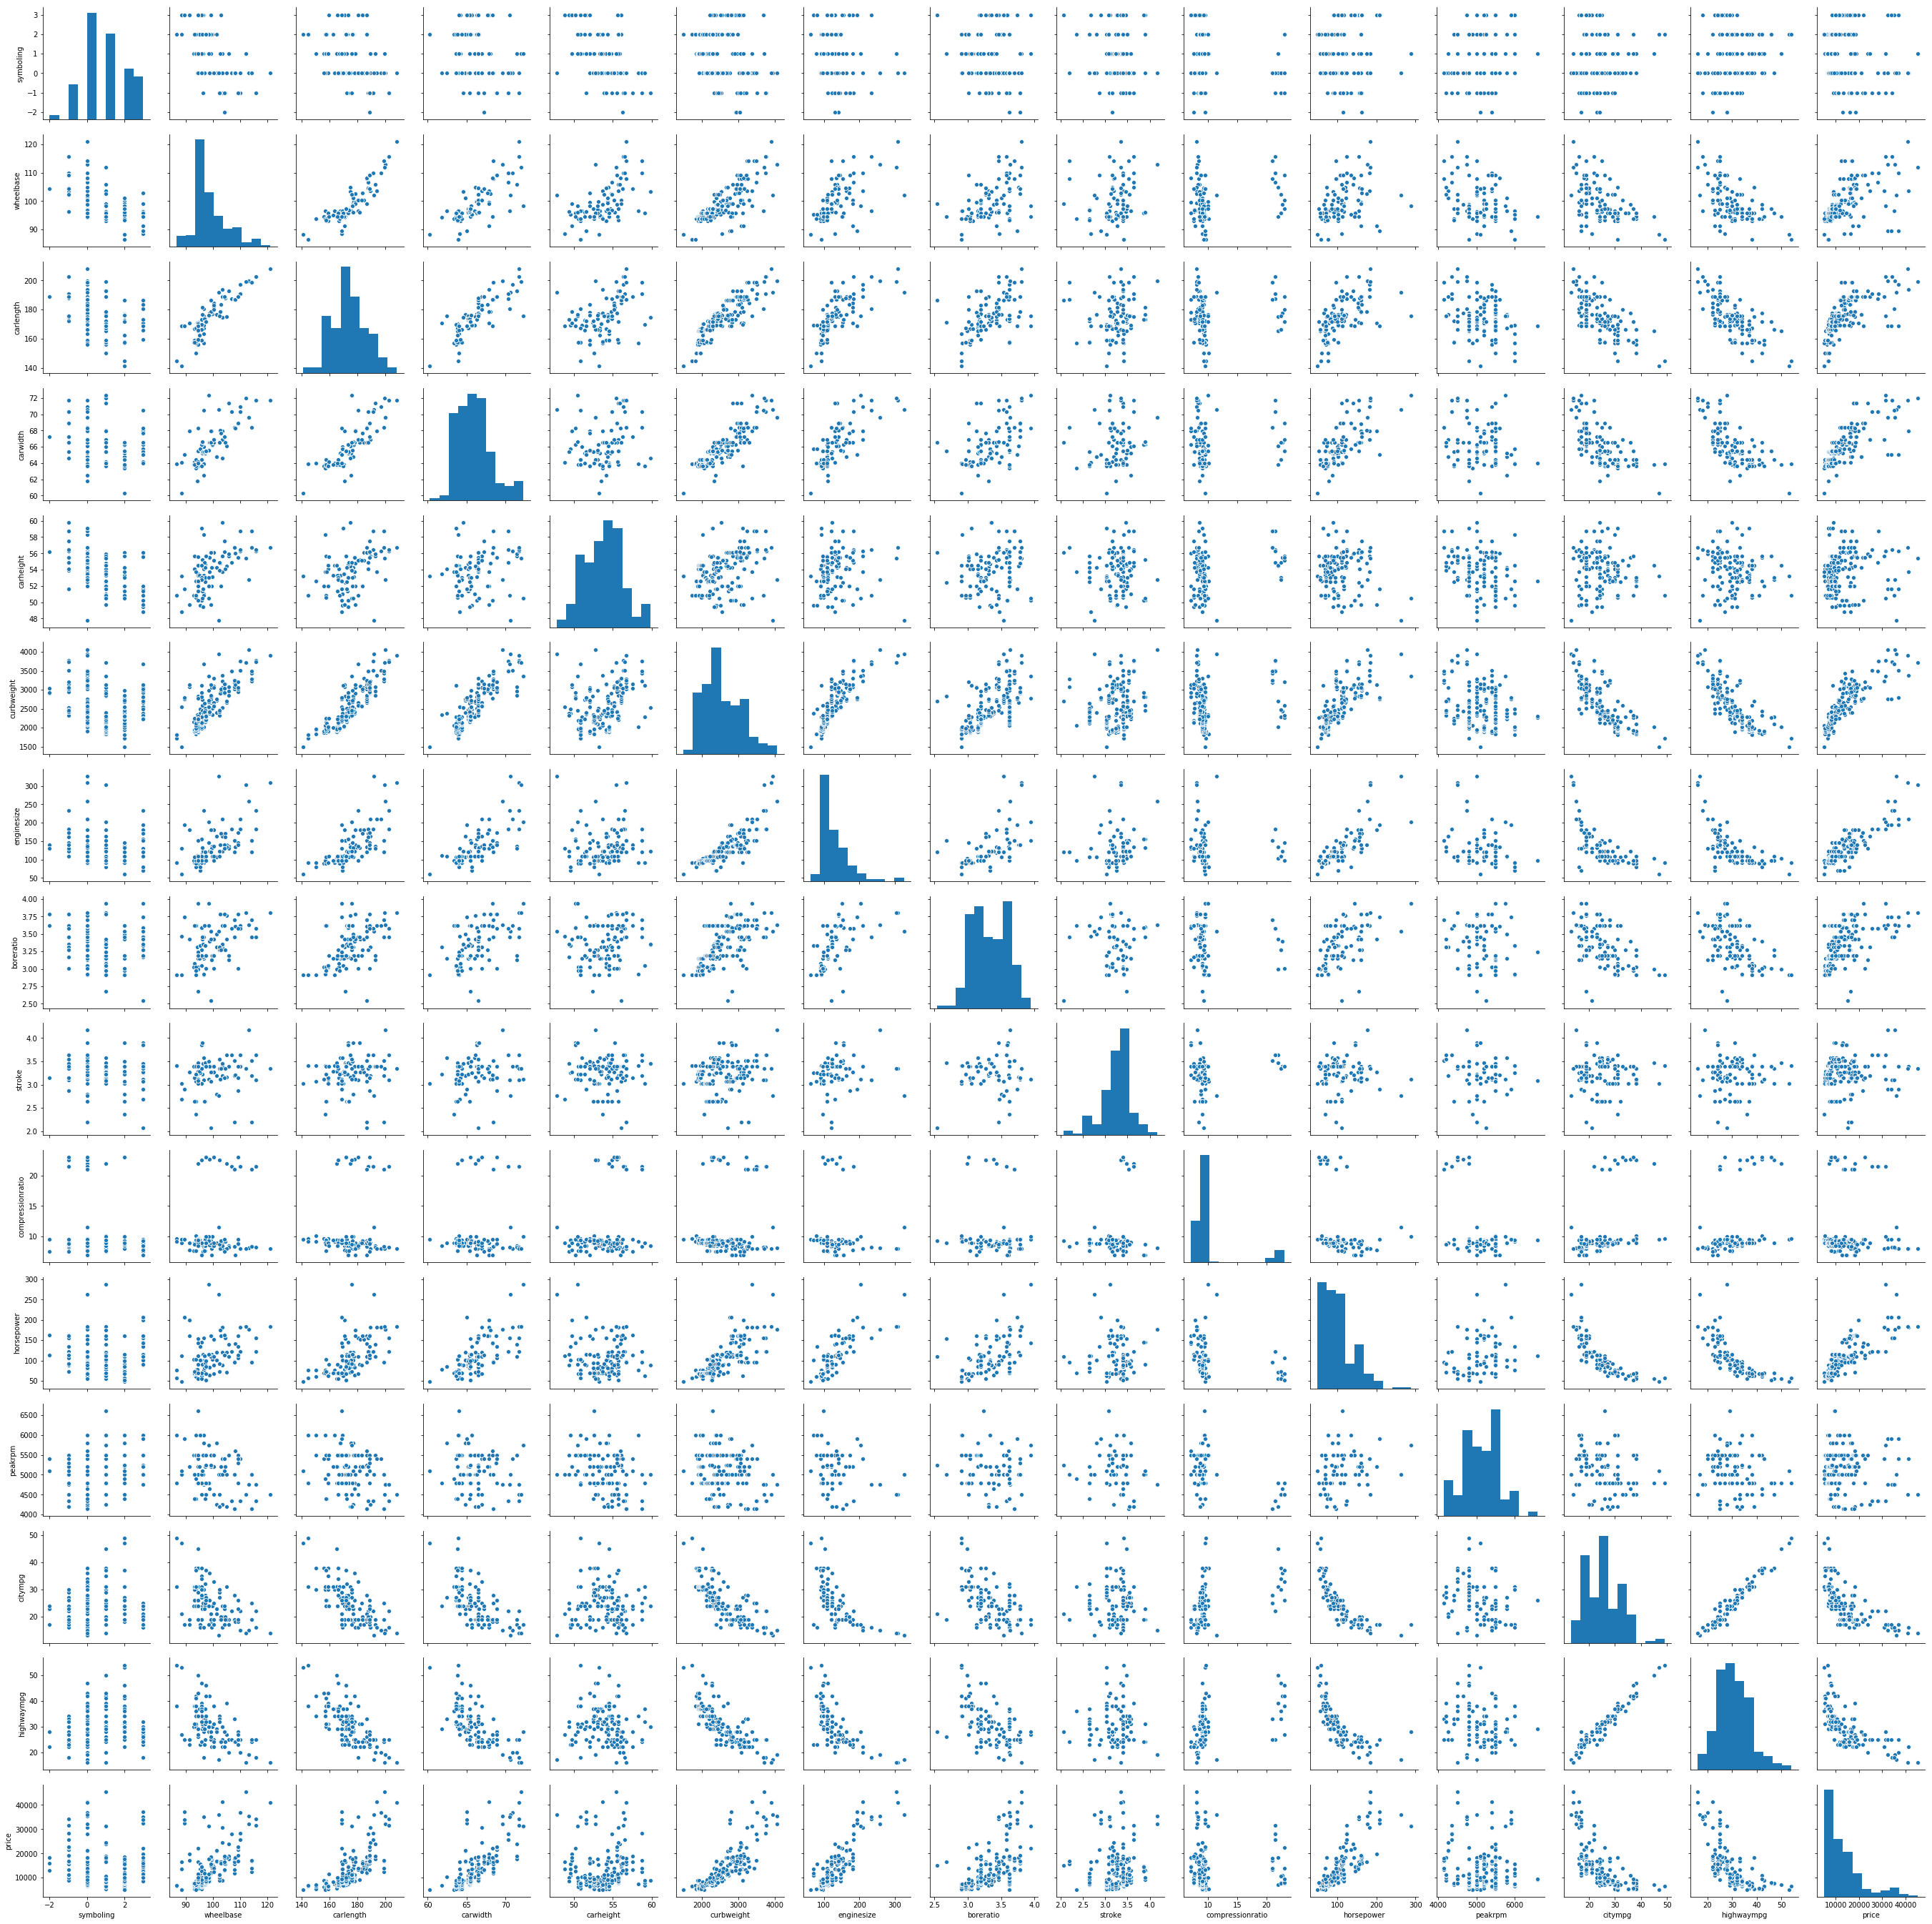

In [810]:
plt.figure(figsize=(40,30))
sns.pairplot(car)
plt.show()

From the pair plots between dependent variable (price) and other independent variables, we can see some correlation between wheelbase,carlength, carwidth, curbweight, enginesize, boreratio(little), horsepower, citympg (-ve), highwaympg(-ve)

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for these variables.

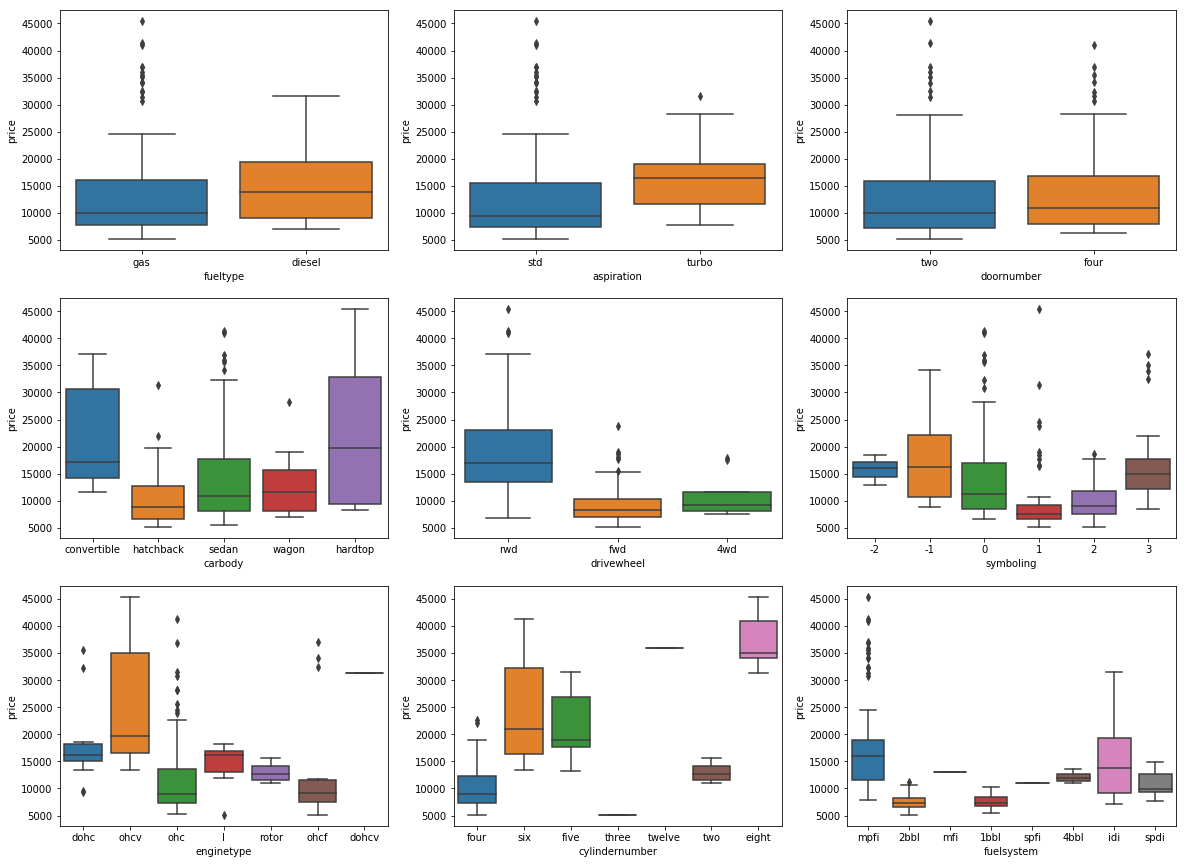

In [811]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(3,3,6)
sns.boxplot(x = 'symboling', y = 'price', data = car)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)

plt.show()

We can see that doornumber does not have much effect on the price. Rest all the categorcal values play some part in determining the price.

Also Visualize the Company name with the price.

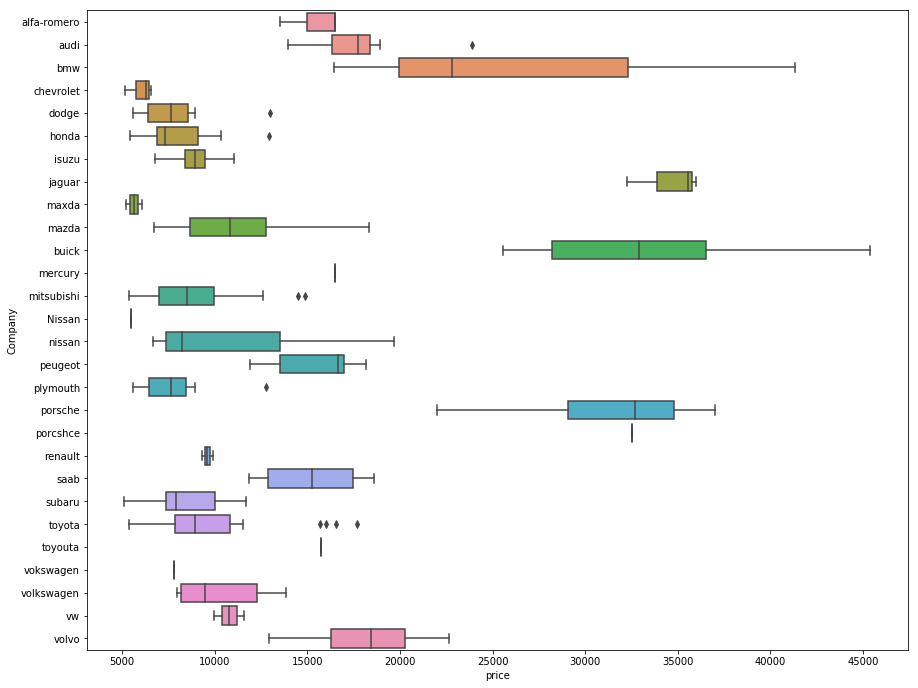

In [812]:
plt.figure(figsize=(50,40))
plt.subplot(3,3,9)
sns.boxplot(y = 'Company', x = 'price', data = car)
plt.show()

We see that there are few spellings issues in the company names. volkswagen is also spelt as vokswagen and vw, porsche is also spelt as porcshce. Nissan as nissan, mazda as also maxda

In [813]:
car['Company']=car['Company'].replace('vokswagen','volkswagen')
car['Company']=car['Company'].replace('vw','volkswagen')
car['Company']=car['Company'].replace('porcshce','porsche')
car['Company']=car['Company'].replace('Nissan','nissan')
car['Company']=car['Company'].replace('maxda','mazda')

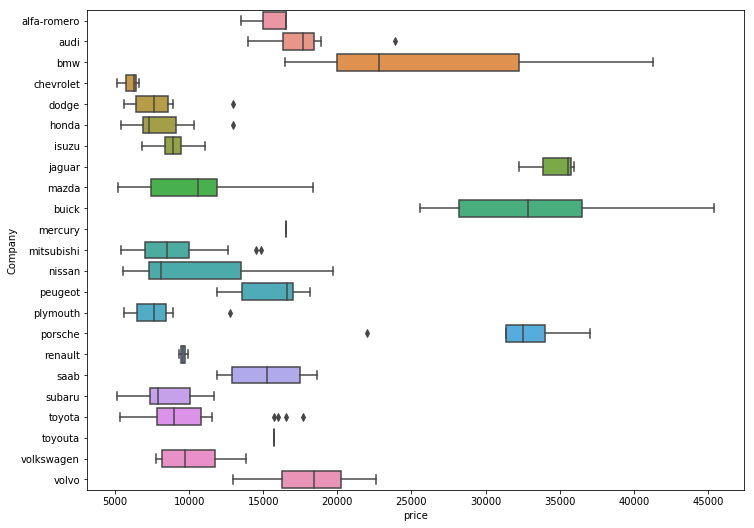

In [814]:
plt.figure(figsize=(40,30))
plt.subplot(3,3,1)
sns.boxplot(y = 'Company', x = 'price', data = car)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument.

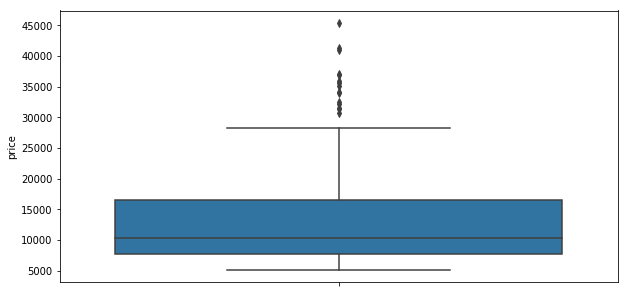

In [815]:
plt.figure(figsize = (10, 5))
sns.boxplot(y = 'price', data = car)
plt.show()

In [816]:
car.loc[(car.price > 30000)]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
15,0,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,bmw
16,0,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
17,0,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,bmw
47,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
48,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar
49,0,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar
70,-1,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick
71,-1,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
72,3,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,...,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,buick
73,0,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick


The outliers belong to the car companies porsche, buick, jaguar, bmw. So not deleting any rows.

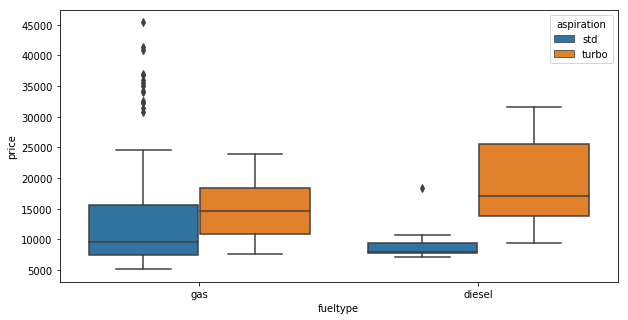

In [817]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'fueltype', y = 'price', hue = 'aspiration', data = car)
plt.show()

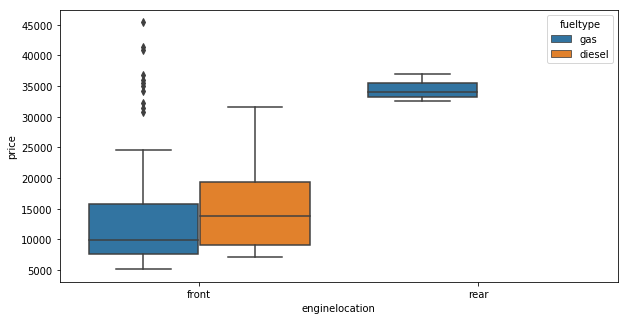

In [818]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'enginelocation', y = 'price', hue = 'fueltype', data = car)
plt.show()

In [819]:
car['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

enginelocation as 'rear' has only 3 value, rest all are front. So we can drop this column also,

In [820]:
car=car.drop(['enginelocation'],axis=1)

In [821]:
car['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [822]:
car['fuelsystem']=car['fuelsystem'].replace('mfi','mpfi')

In [823]:
car['fuelsystem']=car['fuelsystem'].replace('spdi','spfi')

In [824]:
car['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [825]:
car['enginetype']=car['enginetype'].replace('dohcv','dohc')

In [826]:
car.loc[(car['Company'] == 'porsche')]['enginetype']

125     ohc
126    ohcf
127    ohcf
128    ohcf
129    dohc
Name: enginetype, dtype: object

The values look to be valid. So keeping them as it is.

## Step 3: Data Preparation

- You can see that your dataset has many columns with categorical values

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to dummy variables with numeric values. The ordinal variables can be converted into numeric.

In [827]:
car['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [828]:
varlist =  ['cylindernumber', 'doornumber']

# Defining the map function
def binary_map(x):
    return x.map({'four': 4, 'six': 6,'five':5,'eight':8,'two':2, 'twelve':12,'three':3})

# Applying the function to the housing list
car[varlist] = car[varlist].apply(binary_map)

In [829]:
car.loc[:,varlist].head()

,cylindernumber,doornumber
0,4,2
1,4,2
2,6,2
3,4,4
4,5,4


In [830]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price            

In [831]:
# List of categorical variables to convert into numeric

varlist =  ['fueltype', 'aspiration','carbody','drivewheel','enginetype','fuelsystem','Company']

car = pd.get_dummies(data=car,columns=varlist,drop_first=True)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 57 columns):
symboling             205 non-null int64
doornumber            205 non-null int64
wheelbase             205 non-null float64
carlength             205 non-null float64
carwidth              205 non-null float64
carheight             205 non-null float64
curbweight            205 non-null int64
cylindernumber        205 non-null int64
enginesize            205 non-null int64
boreratio             205 non-null float64
stroke                205 non-null float64
compressionratio      205 non-null float64
horsepower            205 non-null int64
peakrpm               205 non-null int64
citympg               205 non-null int64
highwaympg            205 non-null int64
price                 205 non-null float64
fueltype_gas          205 non-null uint8
aspiration_turbo      205 non-null uint8
carbody_hardtop       205 non-null uint8
carbody_hatchback     205 non-null uint8
carbody_sedan     

In [832]:
car['pwtowtratio']=car['horsepower']/car['curbweight']

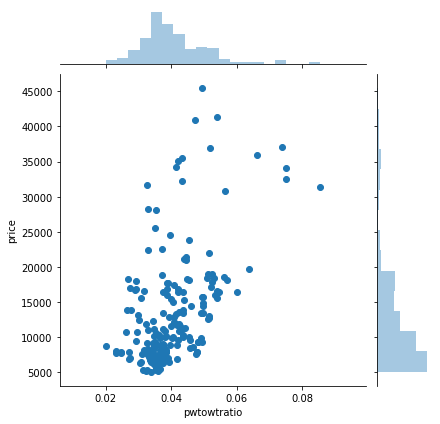

In [833]:
sns.jointplot('pwtowtratio','price',car)
plt.show()

Power/Weight has some relation to the price but there is a lot of variance also.

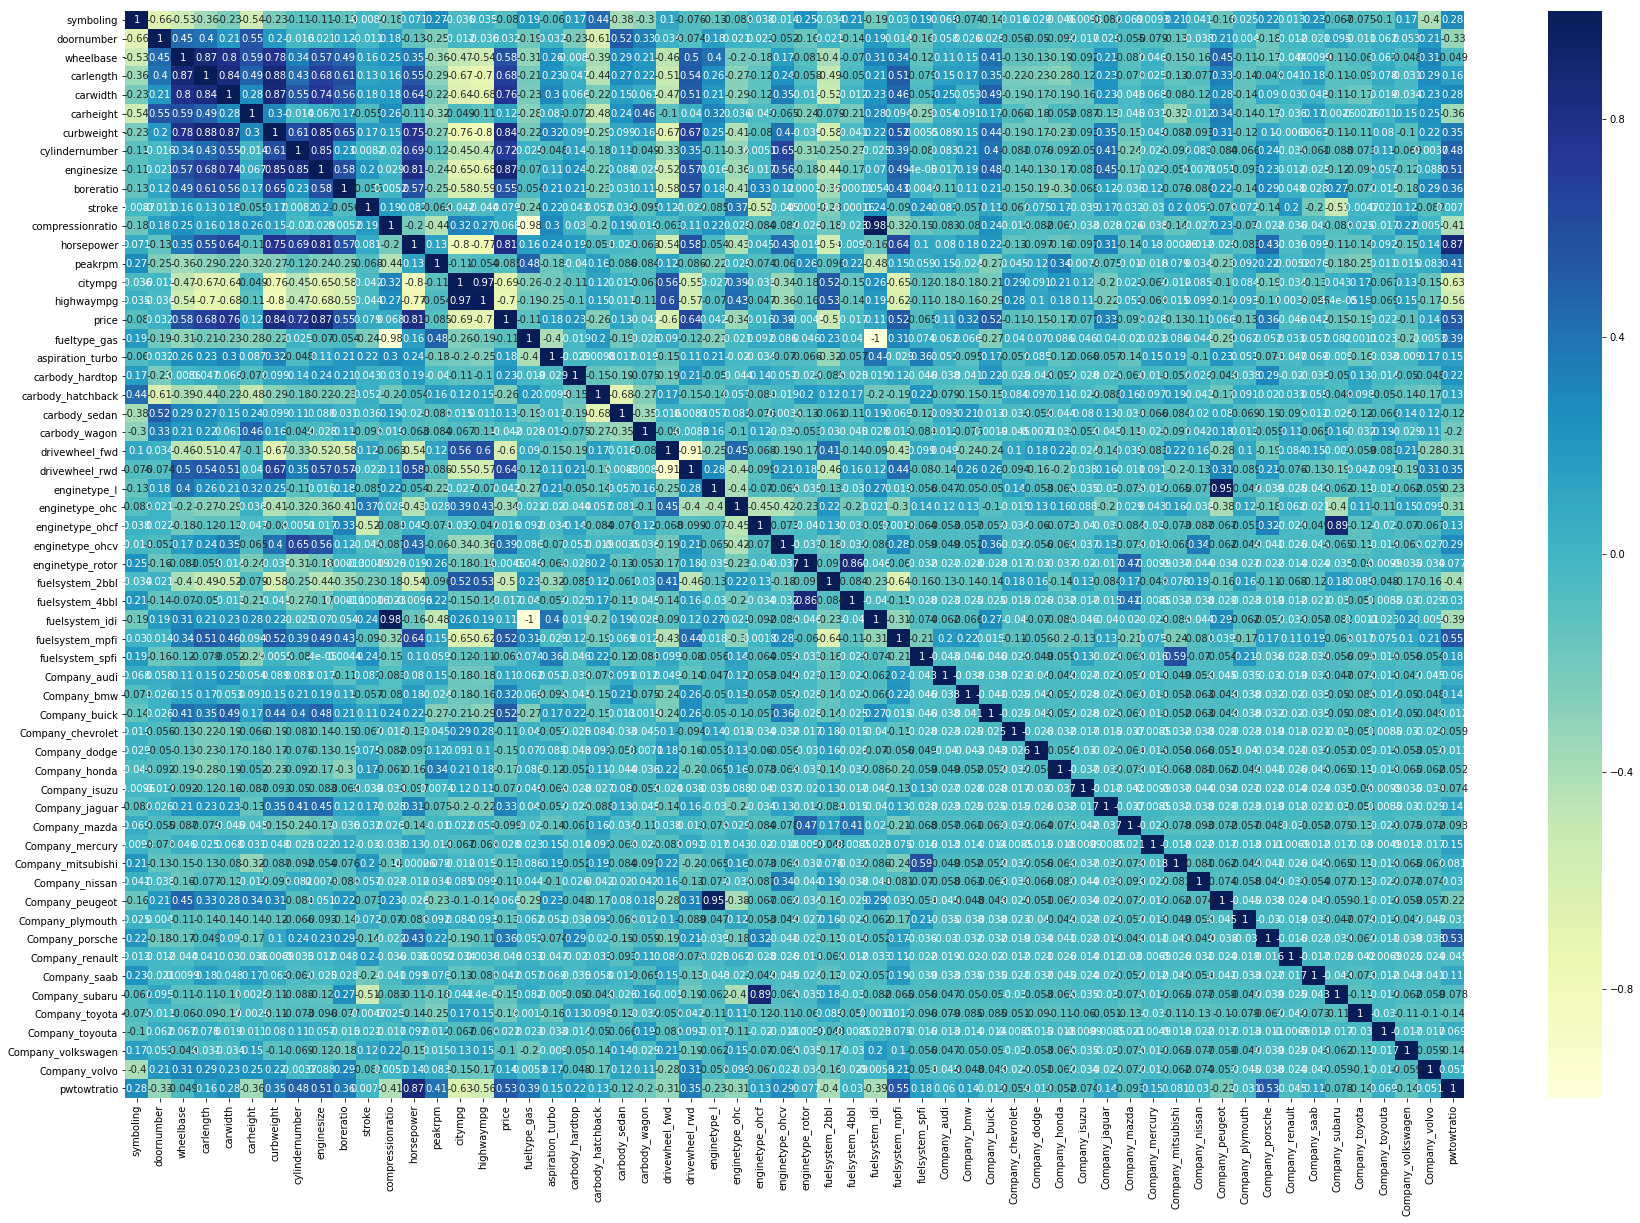

In [834]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(car.corr(), annot = True, cmap="YlGnBu")
plt.show()

Price has a correlation with wheelbase, carlength, carwidth, curbweight, cylindernumber,enginesize, horsepower

citympg has a very high correlation with highwaympg, so we can drop one of them.

In [835]:
car.loc[car['Company_subaru'] == 1]['enginetype_ohcf']

138    1
139    1
140    1
141    1
142    1
143    1
144    1
145    1
146    1
147    1
148    1
149    1
Name: enginetype_ohcf, dtype: uint8

Compny Subaru makes only cars with enginetype ohcf. So we can delete Company_Subaru from the columns.

In [836]:
car.loc[car['Company_peugeot'] == 1]['enginetype_l']

107    1
108    1
109    1
110    1
111    1
112    1
113    1
114    1
115    1
116    1
117    1
Name: enginetype_l, dtype: uint8

Similarly Company Peugeot makes cars with engine type_l. So we can drop col Company_peugeot

In [837]:
car.loc[car['fuelsystem_idi'] == 1]['compressionratio']

63     22.7
66     22.0
67     21.5
68     21.5
69     21.5
70     21.5
90     21.9
108    21.0
110    21.0
112    21.0
114    21.0
116    21.0
158    22.5
159    22.5
174    22.5
182    23.0
184    23.0
187    23.0
192    23.0
203    23.0
Name: compressionratio, dtype: float64

In [838]:
car['compressionratio'].describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compressionratio, dtype: float64

fuelsystem_idi has a very high compression ratio and so is highly correlated. So we can drop fuelsystem_idi

In [839]:
car.loc[car['fuelsystem_4bbl'] == 1]['enginetype_rotor']

55    1
56    1
57    1
Name: enginetype_rotor, dtype: uint8

In [840]:
car.loc[car['enginetype_rotor'] == 1]['fuelsystem_4bbl']

55    1
56    1
57    1
58    0
Name: fuelsystem_4bbl, dtype: uint8

All fuelsystem 4bbl have enginetype as rotors so we can drop fuelsystem_4bbl

In [841]:
car=car.drop(['Company_subaru','Company_peugeot','fuelsystem_idi','fuelsystem_4bbl','highwaympg'],axis=1)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [842]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

We saw that citympg and highwaympg are highly correlated. So we can drop one of them.

In [843]:
df_train.nunique()

symboling               6
doornumber              2
wheelbase              46
carlength              68
carwidth               38
carheight              46
curbweight            122
cylindernumber          7
enginesize             39
boreratio              33
stroke                 34
compressionratio       31
horsepower             54
peakrpm                22
citympg                27
price                 137
fueltype_gas            2
aspiration_turbo        2
carbody_hardtop         2
carbody_hatchback       2
carbody_sedan           2
carbody_wagon           2
drivewheel_fwd          2
drivewheel_rwd          2
enginetype_l            2
enginetype_ohc          2
enginetype_ohcf         2
enginetype_ohcv         2
enginetype_rotor        2
fuelsystem_2bbl         2
fuelsystem_mpfi         2
fuelsystem_spfi         2
Company_audi            2
Company_bmw             2
Company_buick           2
Company_chevrolet       2
Company_dodge           2
Company_honda           2
Company_isuz

Company_mercury, fuelsystem_spfi, fuelsystem_mfi have only one value. So they seem insignificant.

### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. 
We will use MinMax scaling.

In [844]:
from sklearn.preprocessing import MinMaxScaler

In [845]:
scaler = MinMaxScaler()

In [846]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['symboling', 'doornumber','wheelbase', 'carlength', 'carwidth', 'carheight','curbweight','pwtowtratio','enginesize','cylindernumber','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [847]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Company_nissan,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_toyota,Company_toyouta,Company_volkswagen,Company_volvo,pwtowtratio
122,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,...,0,1,0,0,0,0,0,0,0,0.169146
125,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,...,0,0,1,0,0,0,0,0,0,0.480607
166,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,...,0,0,0,0,0,1,0,0,0,0.438242
1,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,...,0,0,0,0,0,0,0,0,0,0.360040
199,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,...,0,0,0,0,0,0,0,0,1,0.478148


In [848]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Company_nissan,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_toyota,Company_toyouta,Company_volkswagen,Company_volvo,pwtowtratio
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,...,0.097902,0.027972,0.020979,0.013986,0.020979,0.132867,0.006993,0.048951,0.041958,0.301305
std,0.239200,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,...,0.298227,0.165472,0.143818,0.117845,0.143818,0.340624,0.083624,0.216524,0.201198,0.139794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218294
50%,0.600000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268725
75%,0.600000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.360401
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [849]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a model using RFE

Since the number of variables are large, Forward or backward selection process would be quite tedious. So we will use RFE.

In [850]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [851]:
#Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [852]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 23),
 ('doornumber', False, 37),
 ('wheelbase', False, 6),
 ('carlength', False, 18),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 11),
 ('horsepower', True, 1),
 ('peakrpm', False, 8),
 ('citympg', False, 20),
 ('fueltype_gas', False, 12),
 ('aspiration_turbo', False, 9),
 ('carbody_hardtop', False, 7),
 ('carbody_hatchback', False, 3),
 ('carbody_sedan', False, 5),
 ('carbody_wagon', False, 4),
 ('drivewheel_fwd', False, 35),
 ('drivewheel_rwd', False, 32),
 ('enginetype_l', False, 25),
 ('enginetype_ohc', False, 33),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', False, 28),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 16),
 ('fuelsystem_mpfi', False, 19),
 ('fuelsystem_spfi', False, 17),
 ('Company_audi', True, 1),
 ('Company_bmw', True, 1),
 ('Company_buick', True, 1),
 ('Compa

In [853]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'enginetype_rotor', 'Company_audi',
       'Company_bmw', 'Company_buick', 'Company_porsche', 'Company_saab',
       'Company_volvo', 'pwtowtratio'],
      dtype='object')

On the basis of EDA(scater plots) we see that the following columns have some correlation with price. So we add them in our model

In [854]:
col=list(col)
col.extend(['wheelbase','citympg','aspiration_turbo'])

In [855]:
col

['carwidth',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'enginetype_rotor',
 'Company_audi',
 'Company_bmw',
 'Company_buick',
 'Company_porsche',
 'Company_saab',
 'Company_volvo',
 'pwtowtratio',
 'wheelbase',
 'citympg',
 'aspiration_turbo']

### Building model using statsmodel, for the detailed statistics

In [856]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [857]:
import statsmodels.api as sm

# Add a constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_rfe1).fit()

In [858]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     117.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.64e-69
Time:                        18:13:18   Log-Likelihood:                 223.96
No. Observations:                 143   AIC:                            -409.9
Df Residuals:                     124   BIC:                            -353.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3592      0.116  

In [859]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,horsepower,196.16
14,pwtowtratio,137.05
1,curbweight,102.34
3,enginesize,100.39
2,cylindernumber,68.30
0,carwidth,65.03
4,boreratio,34.43
5,stroke,34.29
15,wheelbase,31.41
16,citympg,15.39


R-squared is quite good (above 0.9) and so is the adjusted R-Squared. However we can see from the p-values, wheelbase is highly insignificant in presence of other variables and VIF is also high, so it can be dropped

In [860]:
X_train_rfe = X_train_rfe.drop(["wheelbase"], axis = 1)

Rebuilding the model

In [861]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe2= sm.add_constant(X_train_rfe)

In [862]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model

In [863]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     125.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.28e-70
Time:                        18:13:19   Log-Likelihood:                 223.70
No. Observations:                 143   AIC:                            -411.4
Df Residuals:                     125   BIC:                            -358.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3484      0.115  

There is no change in the adjusted R-Squared value. And AIC has decreased a little, which is good. No lets examine the Variance Inflation Factor (VIF)

In [864]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,horsepower,190.37
14,pwtowtratio,136.55
3,enginesize,100.35
1,curbweight,81.18
2,cylindernumber,67.71
0,carwidth,47.04
5,stroke,34.24
4,boreratio,34.09
15,citympg,15.39
16,aspiration_turbo,2.24


citympg has a high p-value and high VIF. So lets drop it and rebuild the model.

In [865]:
X_train_rfe = X_train_rfe.drop(["citympg"], axis = 1)

In [866]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe3 = sm.add_constant(X_train_rfe)

In [867]:
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     133.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.40e-71
Time:                        18:13:19   Log-Likelihood:                 223.35
No. Observations:                 143   AIC:                            -412.7
Df Residuals:                     126   BIC:                            -362.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4041      0.090  

There is no change in the adjusted R-Squared value. And AIC has decreased a little, which is good. No lets examine the Variance Inflation Factor (VIF)

In [868]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,horsepower,169.51
14,pwtowtratio,133.96
3,enginesize,94.75
1,curbweight,81.04
2,cylindernumber,47.70
0,carwidth,47.04
4,boreratio,30.86
5,stroke,28.75
15,aspiration_turbo,2.20
7,enginetype_rotor,1.98


curbweight has a high p value and also high VIFs. So it can be removed.

In [869]:
X_train_rfe = X_train_rfe.drop(["curbweight"], axis = 1)

In [870]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe4 = sm.add_constant(X_train_rfe)

In [871]:
lm4 = sm.OLS(y_train,X_train_rfe4).fit() 

In [872]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     140.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.51e-71
Time:                        18:13:20   Log-Likelihood:                 221.88
No. Observations:                 143   AIC:                            -411.8
Df Residuals:                     127   BIC:                            -364.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2906      0.057  

Not much change in the Adj R-squared value. Lets examine the VIFs

In [873]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,horsepower,108.46
2,enginesize,92.67
13,pwtowtratio,81.14
0,carwidth,44.05
1,cylindernumber,41.36
4,stroke,22.02
3,boreratio,21.21
14,aspiration_turbo,2.09
6,enginetype_rotor,1.91
9,Company_buick,1.76


VIFs are still higher than 10. aspiration_turbo have very less low confidence level and the p-value is among the highest. So
lets drop it.

In [874]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('aspiration_turbo', 1,)

In [875]:
# Build a third fitted model
X_train_rfe5 = sm.add_constant(X_train_rfe)

lr5 = sm.OLS(y_train, X_train_rfe5).fit()

In [876]:
# Print the summary of the model
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     144.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.26e-71
Time:                        18:13:20   Log-Likelihood:                 218.75
No. Observations:                 143   AIC:                            -407.5
Df Residuals:                     128   BIC:                            -363.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2994      0.057  

In [877]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,horsepower,95.49
2,enginesize,85.00
13,pwtowtratio,79.36
0,carwidth,43.92
1,cylindernumber,40.73
3,boreratio,20.81
4,stroke,20.63
9,Company_buick,1.61
6,enginetype_rotor,1.59
10,Company_porsche,1.52


Noy much change in the Adj R squared value and moreover the VIFs are still high. Company_saab has a low confidence level and p-value is the highest among all. So lets drop it.

In [878]:
X_train_rfe = X_train_rfe.drop('Company_saab', 1)

In [879]:
# Build a second fitted model
X_train_rfe6 = sm.add_constant(X_train_rfe)

lr6 = sm.OLS(y_train, X_train_rfe6).fit()

In [880]:
# Print the summary of the model

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     149.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.35e-71
Time:                        18:13:21   Log-Likelihood:                 215.35
No. Observations:                 143   AIC:                            -402.7
Df Residuals:                     129   BIC:                            -361.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3037      0.059  

In [881]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,horsepower,93.63
2,enginesize,83.24
12,pwtowtratio,79.23
0,carwidth,43.90
1,cylindernumber,40.72
4,stroke,20.63
3,boreratio,20.46
9,Company_buick,1.61
6,enginetype_rotor,1.54
10,Company_porsche,1.47


We still have Adjusted R-squared value above .9 and a good AIC. The variable enginetype_rotor has a low confidence level and p value is the highest among all. So lets drop it.

In [882]:
X_train_rfe = X_train_rfe.drop('enginetype_rotor', 1)

In [883]:
# Build a fourth fitted model
X_train_rfe7 = sm.add_constant(X_train_rfe)

lr7 = sm.OLS(y_train, X_train_rfe7).fit()

In [884]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     157.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.75e-71
Time:                        18:13:21   Log-Likelihood:                 212.91
No. Observations:                 143   AIC:                            -399.8
Df Residuals:                     130   BIC:                            -361.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3409      0.057     

In [885]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,horsepower,92.42
2,enginesize,81.86
11,pwtowtratio,78.86
0,carwidth,42.67
1,cylindernumber,38.58
4,stroke,20.60
3,boreratio,20.45
8,Company_buick,1.60
9,Company_porsche,1.42
6,Company_audi,1.35


Adjusted R-squared is good and so is the AIC. But the VIFs are high. So lets drop Company_audi which have a low confidence level of 0.02

In [886]:
X_train_rfe = X_train_rfe.drop(["Company_audi"], axis = 1)

In [887]:
X_train_rfe8 = sm.add_constant(X_train_rfe)

In [888]:
lr8 = sm.OLS(y_train,X_train_rfe8).fit() 
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.61e-71
Time:                        18:13:22   Log-Likelihood:                 209.14
No. Observations:                 143   AIC:                            -394.3
Df Residuals:                     131   BIC:                            -358.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3285      0.058     

In [889]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,horsepower,92.36
2,enginesize,81.84
10,pwtowtratio,78.63
1,cylindernumber,38.49
0,carwidth,36.64
4,stroke,20.25
3,boreratio,18.66
7,Company_buick,1.54
8,Company_porsche,1.42
9,Company_volvo,1.18


Adj squared R and AIC are still good. But VIFs are high. Lets drop Company_volvo which has low confidence level of 0.036

In [890]:
X_train_rfe = X_train_rfe.drop(["Company_volvo"], axis = 1)

In [891]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lr9 = sm.OLS(y_train,X_train_rfe9).fit()   # Running the linear model
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     165.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.49e-69
Time:                        18:13:22   Log-Likelihood:                 203.18
No. Observations:                 143   AIC:                            -384.4
Df Residuals:                     132   BIC:                            -351.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3144      0.060     

In [892]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,horsepower,91.83
2,enginesize,81.52
9,pwtowtratio,78.09
1,cylindernumber,38.45
0,carwidth,36.31
4,stroke,20.15
3,boreratio,18.44
7,Company_buick,1.51
8,Company_porsche,1.40
6,Company_bmw,1.16


Adjusted R-squared and AIC are good. But VIFs are still high. Lets drop pwtowtratio which have the highest p value among others and high VIf.

In [893]:
X_train_rfe = X_train_rfe.drop(["pwtowtratio"], axis = 1)
X_train_rfe10 = sm.add_constant(X_train_rfe)

In [894]:
lr10 = sm.OLS(y_train,X_train_rfe10).fit()   # Running
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.36e-69
Time:                        18:13:23   Log-Likelihood:                 198.95
No. Observations:                 143   AIC:                            -377.9
Df Residuals:                     133   BIC:                            -348.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2478      0.056     

In [895]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,24.12
2,enginesize,23.98
1,cylindernumber,15.36
5,horsepower,12.42
3,boreratio,10.30
4,stroke,7.63
7,Company_buick,1.50
8,Company_porsche,1.39
6,Company_bmw,1.16


Adj R-squared value is good but VIF is quite high. p-value are all 0 and confidence levels are also good. Lets drop carwidth which has the highest VIF.

In [896]:
X_train_rfe = X_train_rfe.drop(["carwidth"], axis = 1)

In [897]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lr11 = sm.OLS(y_train,X_train_rfe11).fit()   # Running the linear model
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     130.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.98e-59
Time:                        18:13:23   Log-Likelihood:                 172.46
No. Observations:                 143   AIC:                            -326.9
Df Residuals:                     134   BIC:                            -300.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2309      0.068     

The Adj R-squared value have gone down to 0.88 and AIC has increased. But still it is good. Let see the VIFs.

In [898]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,23.97
0,cylindernumber,14.82
4,horsepower,11.43
2,boreratio,6.91
3,stroke,5.85
7,Company_porsche,1.36
6,Company_buick,1.31
5,Company_bmw,1.15


VIFs have reduced but still are high. Lets drop enginesize.

In [899]:
X_train_rfe = X_train_rfe.drop(["enginesize"], axis = 1)

In [900]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lr12 = sm.OLS(y_train,X_train_rfe12).fit()   # Running the linear model
print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     99.48
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.00e-50
Time:                        18:13:23   Log-Likelihood:                 146.92
No. Observations:                 143   AIC:                            -277.8
Df Residuals:                     135   BIC:                            -254.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2011      0.043     

In [901]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cylindernumber,9.54
3,horsepower,8.05
1,boreratio,6.27
2,stroke,5.83
6,Company_porsche,1.32
4,Company_bmw,1.13
5,Company_buick,1.13


The p-value of Company_porsche has increased to 0.251, so lets drop it.

In [902]:
X_train_rfe = X_train_rfe.drop(["Company_porsche"], axis = 1)

In [903]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lr13 = sm.OLS(y_train,X_train_rfe13).fit()   # Running the linear model
print(lr13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     115.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.86e-51
Time:                        18:13:24   Log-Likelihood:                 146.22
No. Observations:                 143   AIC:                            -278.4
Df Residuals:                     136   BIC:                            -257.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2013      0.044     -4.

In [904]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cylindernumber,9.44
3,horsepower,7.13
1,boreratio,6.20
2,stroke,5.54
4,Company_bmw,1.12
5,Company_buick,1.12


Still VIFs are more than 5. Lets drop stroke as it has low confidence level.

In [905]:
X_train_rfe = X_train_rfe.drop(["stroke"], axis = 1)

In [906]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lr14 = sm.OLS(y_train,X_train_rfe14).fit()   # Running the linear model
print(lr14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.42e-50
Time:                        18:13:24   Log-Likelihood:                 141.89
No. Observations:                 143   AIC:                            -271.8
Df Residuals:                     137   BIC:                            -254.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1017      0.028     -3.

In [907]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cylindernumber,7.23
2,horsepower,6.88
1,boreratio,4.62
4,Company_buick,1.11
3,Company_bmw,1.10


The Adj R-squared value and AIC are fair enough. The p-value of cylindernumber is the highest. Lets drop it.

In [908]:
X_train_rfe_t = X_train_rfe.drop(["cylindernumber"], axis = 1)

In [909]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe15= sm.add_constant(X_train_rfe_t)

In [910]:
lr15 = sm.OLS(y_train,X_train_rfe15).fit()   # Running the linear model

In [911]:
#Let's see the summary of our linear model
print(lr15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     156.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.57e-50
Time:                        18:13:25   Log-Likelihood:                 139.13
No. Observations:                 143   AIC:                            -268.3
Df Residuals:                     138   BIC:                            -253.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0576      0.020     -2.817

In [912]:
vif = pd.DataFrame()
X = X_train_rfe_t
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,4.08
0,boreratio,3.96
2,Company_bmw,1.09
3,Company_buick,1.07


Adj R-value is 0.814 which is fair enough and AIC is also ok. The p-values are low and the VIFs are also less than 5. So let us select this model and do the residual analysis on it.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [913]:
y_train_price = lr15.predict(X_train_rfe15)

Text(0.5,0,'Errors')

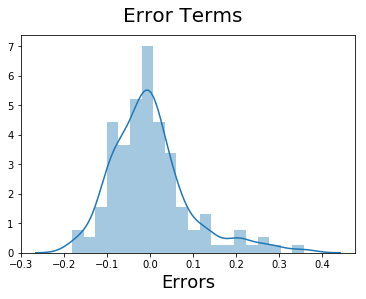

In [914]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 15th model.

#### Applying the scaling on the test sets

In [915]:
num_vars = ['symboling', 'doornumber','wheelbase', 'carlength', 'carwidth', 'carheight','curbweight','pwtowtratio','enginesize','cylindernumber','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [916]:
df_test.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Company_nissan,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_toyota,Company_toyouta,Company_volkswagen,Company_volvo,pwtowtratio
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.0,62.000000,62.000000,62.000000
mean,0.583871,0.564516,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,0.265673,0.556580,...,0.064516,0.048387,0.032258,0.0,0.048387,0.193548,0.0,0.080645,0.080645,0.319133
std,0.271724,0.499868,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,0.162820,0.228484,...,0.247676,0.216335,0.178127,0.0,0.216335,0.398304,0.0,0.274512,0.274512,0.159380
min,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.046209
25%,0.400000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.218895
50%,0.600000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.278451
75%,0.800000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.200000,0.316038,0.746032,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.409660
max,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.600000,0.932075,0.888889,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.840724


#### Dividing into X_test and y_test

In [917]:
y_test = df_test.pop('price')
X_test = df_test

In [918]:
# Creating X_test dataframe by selecting only the desired columns
X_test = X_test[['boreratio','horsepower','Company_bmw','Company_buick']]

In [919]:
# Adding constant variable to test dataframe
X_test_m15 = sm.add_constant(X_test)

In [920]:
X_test_m15.head()

,const,boreratio,horsepower,Company_bmw,Company_buick
160,1.0,0.404762,0.091667,0,0
186,1.0,0.404762,0.154167,0,0
59,1.0,0.563492,0.150000,0,0
165,1.0,0.444444,0.266667,0,0
140,1.0,0.746032,0.104167,0,0


In [921]:
# Making predictions using the 15th model

y_pred_m15 = lr15.predict(X_test_m15)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

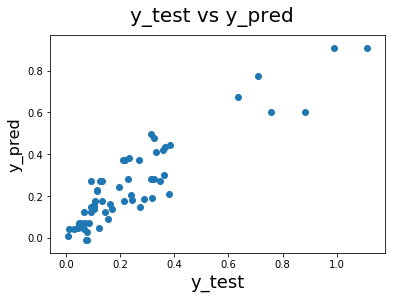

In [922]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m15)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Lets find out the R2 score and RMSE of the Test set

In [923]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m15)

0.831668755578262

In [924]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred_m15))

0.09485255869390864

### Although there can be various other models but overall this model looks quite descent

# Summary
According to my model :-
*  The Price of the Cars in the American Market are primarly dependent on 4 parameters -
   1. boreratio
   2. horsepower
   3. The car brand name BMW
   4. The car brand name Buick
   
#### The equation of our best fitted line is:

$price = 0.1223 \times  boreratio + 0.8424  \times  horsepower + 0.2686 \times Companybmw + 0.3798 \times Companybuick
         - 0.0576$
This means -
If everything else is kept constant,
* with every scaled unit increase of boreratio, the price rises by 0.1223 scaled unit.
* With every scaled unit increase of horsepower, the price rises by 0.8424 scaled unit
* If the Brand name of the car is BMW, price increases by 0.2686 scaled unit.
* If the Brand name of the car is Buick, price rises by 0.3798 scaled unit.

The actual price can be calulated then using actual_price = min +price*(max - min)